# READ DATA

In [1]:
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
from keras.preprocessing.image import random_shift

%matplotlib inline

Using TensorFlow backend.


In [2]:
lines=[]

with open('./data/driving_log.csv') as csvfile:
    reader=csv.reader(csvfile)
    for line in reader:
        lines.append(line)

images=[]
measurements=[]
correction = 0.2 # this is a parameter to tune

for line in lines:
    measurement=float(line[3])
    
    cor=0.2
    if measurement != 0:
        measurement += measurement*np.random.uniform(-0.1,0.1) #Blur the steering
        measurement = [measurement,measurement+cor,measurement-cor]
        if float(line[6]) > 10:
            for i in range(3):
                source_path = line[i]
                filename = source_path.split('\\')[-1]
                current_path = './data/IMG/'+filename
                image=mpimg.imread(current_path)
                
                image_flipped = np.fliplr(image)
                measurement_flipped = -measurement[i]

                images.append(image)
                images.append(image_flipped)
                measurements.append(measurement[i])
                measurements.append(measurement_flipped)          
            


In [3]:
print(len(images))

5382


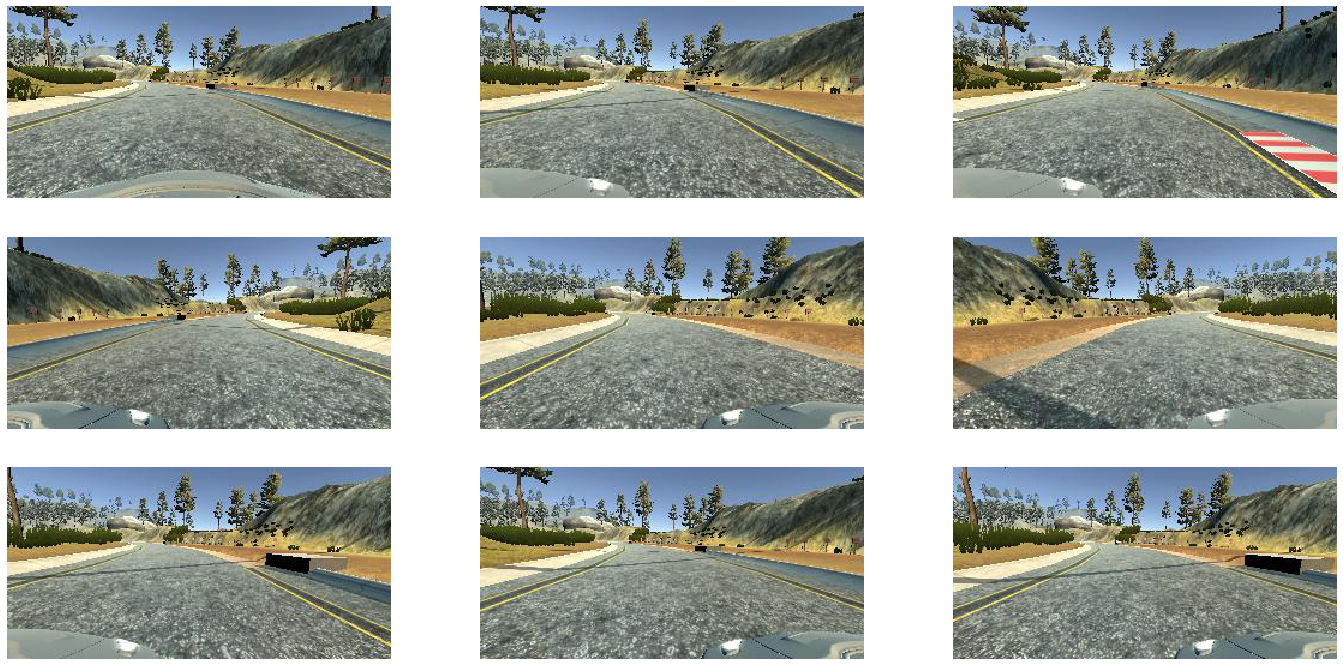

In [4]:
plt.figure(figsize=(24,12))
for i in range(9):
    img=images[random.randint(1,100)]
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

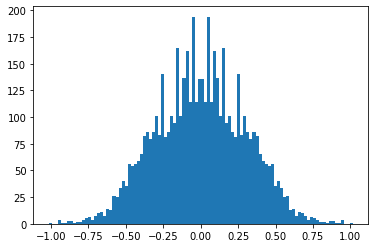

In [5]:
plt.hist(measurements, bins=100)
plt.show()

In [6]:
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    image1 = np.array(image1, dtype = np.float64)
    random_bright = .5+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1[:,:,2][image1[:,:,2]>255]  = 255
    image1 = np.array(image1, dtype = np.uint8)
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

In [7]:
def v_shift(image):
    return random_shift(image, 0, 0.2, 0, 1, 2)

In [12]:
mod_images=[]
mod_meas=[]
for ind, image in enumerate(images):
    for i in range(2):
        img=augment_brightness_camera_images(image)
        img=v_shift(img)
        mod_images.append(img)
        mod_meas.append(measurements[ind])
print(len(mod_images))
print(len(images))

10764
5382


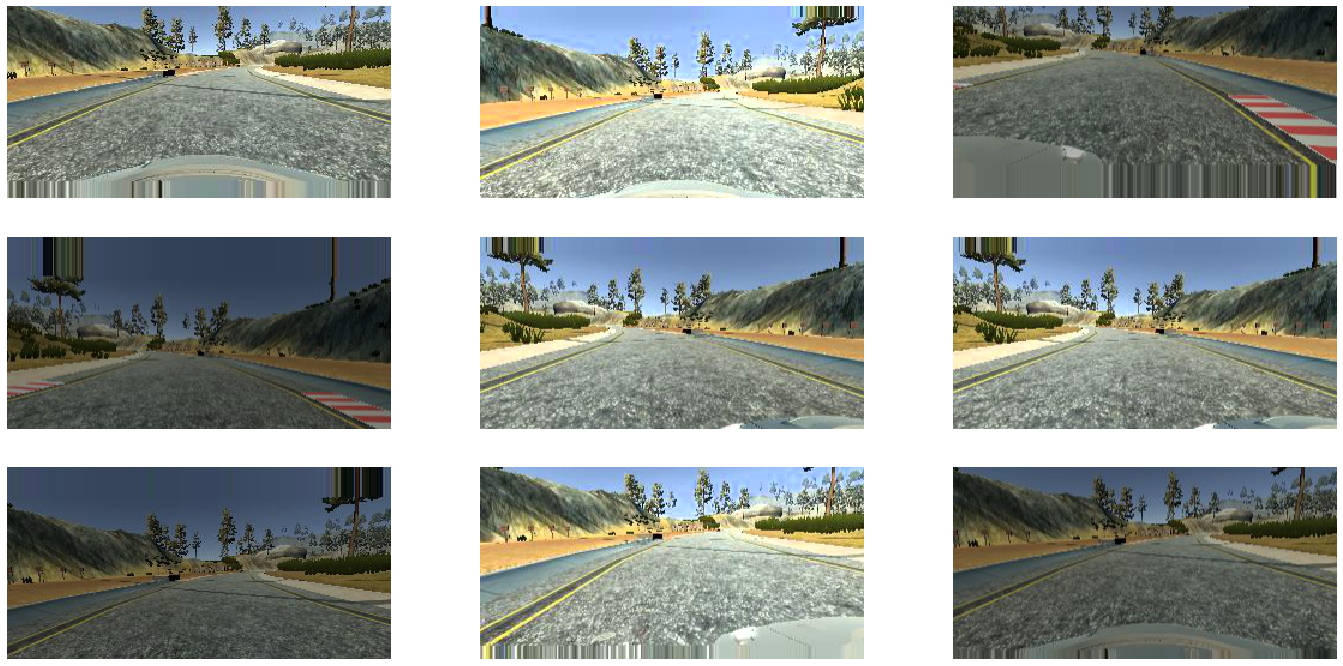

In [13]:
plt.figure(figsize=(24,12))
for i in range(9):
    img = mod_images[random.randint(1,100)]
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [14]:
X_train=np.array(mod_images)
y_train=np.array(mod_meas)

np.save('X_train_easy', X_train)
np.save('y_train_easy', y_train)

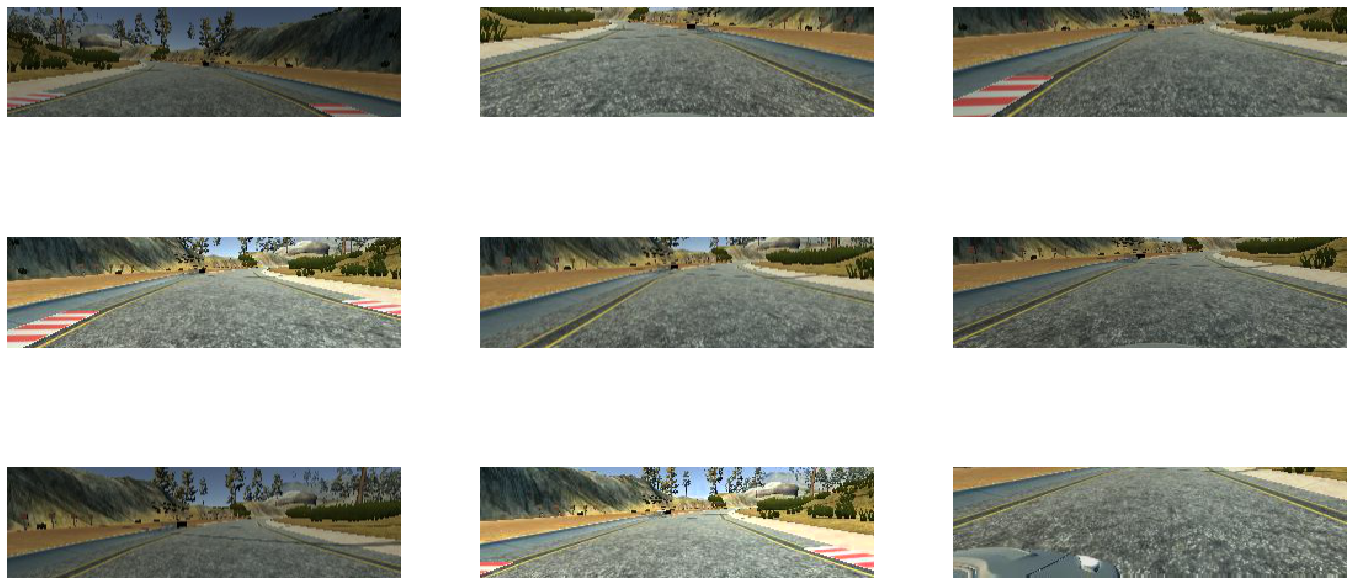

In [15]:
plt.figure(figsize=(24,12))
for i in range(9):
    img = mod_images[random.randint(1,100)]
    img=img[50:-20,...]
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()